In [20]:
from imutils import paths
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelBinarizer

In [8]:
data_path="../dataset/"

In [11]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images(data_path))
data = []
labels = []

# loop over the image paths
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]

	# load the input image (224x224) and preprocess it
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)

[INFO] loading images...


In [17]:
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [22]:
model=load_model("../models/model")

In [24]:
predIdxs = model.predict(data, batch_size=32)
predIdxs = np.argmax(predIdxs, axis=1)

In [31]:
lb.classes_

array([0, 1])

precision    recall  f1-score   support

           0       0.98      0.97      0.98       690
           1       0.97      0.98      0.98       686

    accuracy                           0.98      1376
   macro avg       0.98      0.98      0.98      1376
weighted avg       0.98      0.98      0.98      1376



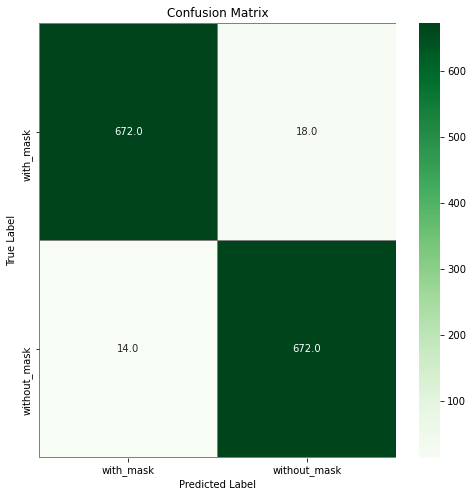

In [35]:
# Confusion matrics
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
print(classification_report(labels.argmax(axis=1), predIdxs))

# compute the confusion matrix
confusion_mtx = confusion_matrix(labels.argmax(axis=1), predIdxs) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
ax.xaxis.set_ticklabels(["with_mask","without_mask"]); ax.yaxis.set_ticklabels(["with_mask","without_mask"]);
plt.show()